# Ronak K. Nandanwar 
# Task 2 on Decision Tree from The Sparks Foundation
# Predict the correct class for the Iris plant using Decision Tree.

In [2]:
# Importing needed library for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# columns present in the dataset
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# dropping Id column from dataset which is not needed for further analysis
df = df.drop(columns=['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# checking how many unique classes available in Species columns 
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# Machine Learning algorithm do not understand the object type or strings available in the dataset, 
# we need to convert this strings into integers

d = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

# using map function to mapping classes availble in Species column to the integer specified in dictionary
df['Species'] = df['Species'].map(d)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Description of dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# check if there is null values available in dataset or not 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

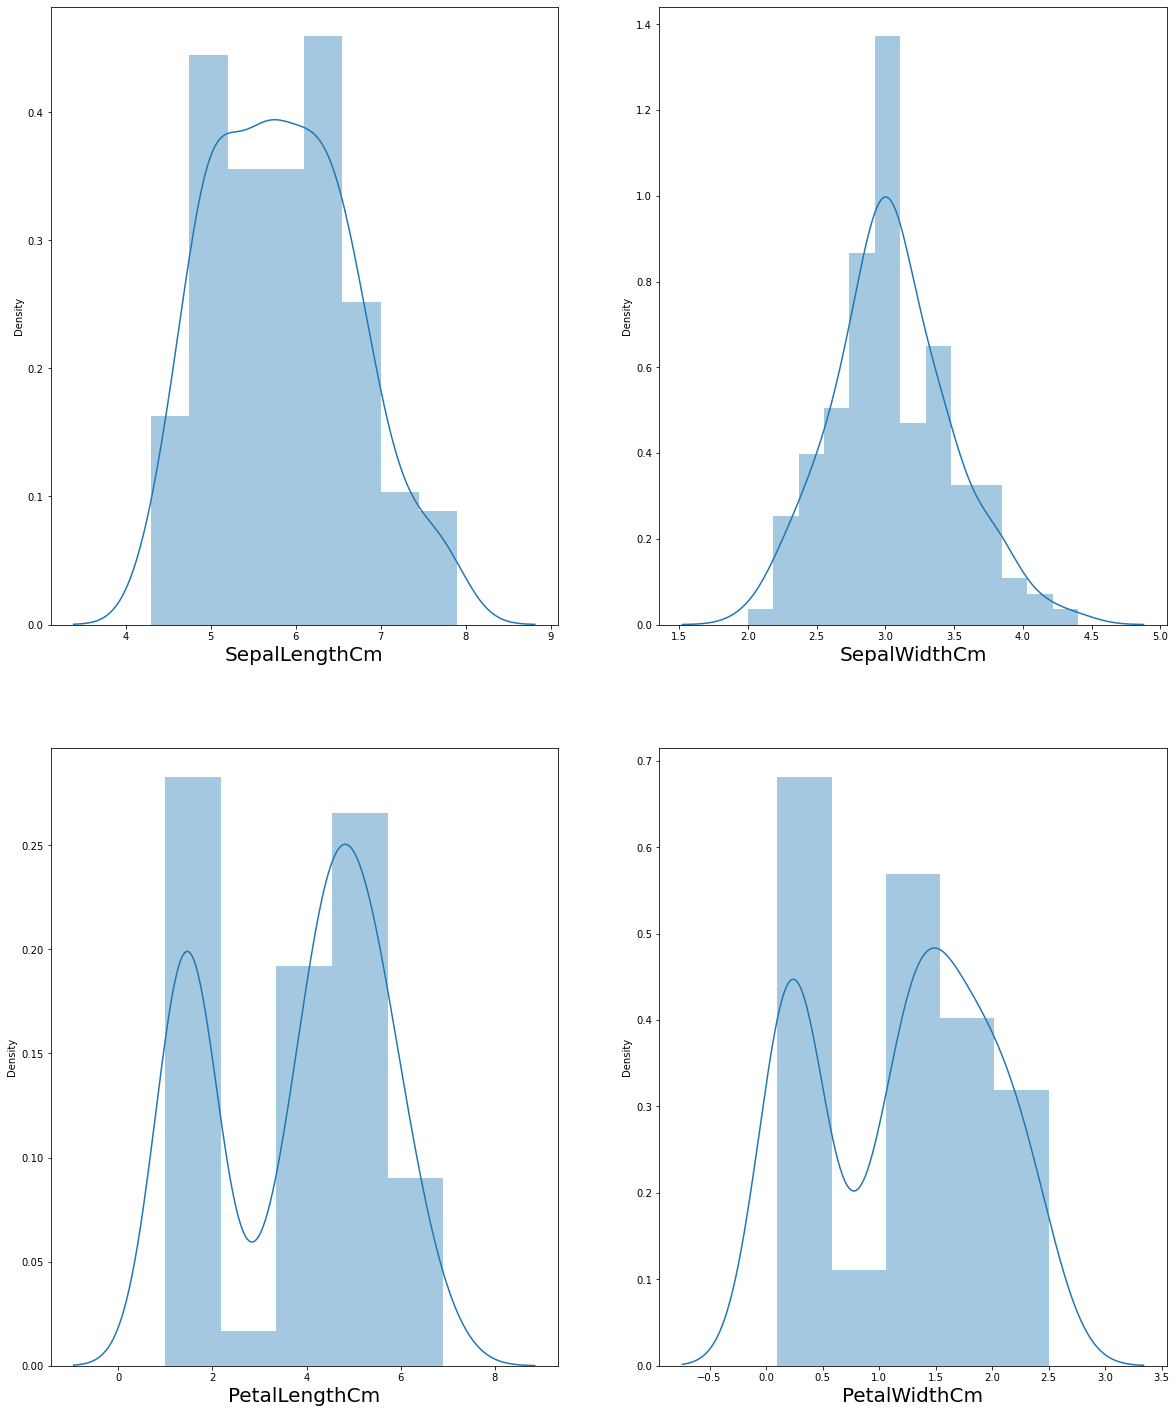

In [10]:
# plotting the distplot to check how the dataset is distributed
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

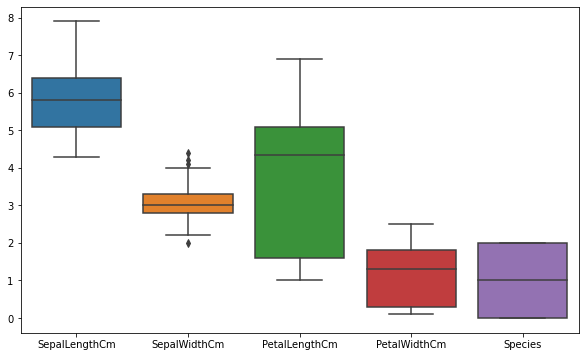

In [11]:
# to check whether there are any outliers or not , we need to plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

In [12]:
# There are few outliers available in SepalWidthCM column, There are few outliers so we can remove it.
q = df['SepalWidthCm'].quantile(0.98)
df = df[df['SepalWidthCm']<q]
q = df['SepalWidthCm'].quantile(0.01)
df = df[df['SepalWidthCm']>q]

In [13]:
# checking shape after removing the outliers 
df['SepalWidthCm'].shape

(143,)

<AxesSubplot:>

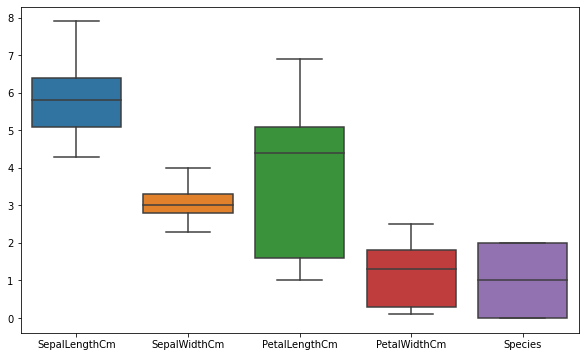

In [14]:
# checking now if there any outliers or not
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

In [15]:
# shape of whole dataset after removing the outliers
df.shape

(143, 5)

In [16]:
# separating dependant and Independant variables
x = df.drop(columns=['Species'],axis=1)
y = df.Species
# Dependant variables is Species
# Independant variables are SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm  

In [17]:
# checking how our x data look like
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
x.shape

(143, 4)

In [19]:
y.shape

(143,)

In [20]:
# splitting training and testing data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6)

In [21]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
24,4.8,3.4,1.9,0.2
56,6.3,3.3,4.7,1.6
132,6.4,2.8,5.6,2.2
28,5.2,3.4,1.4,0.2
...,...,...,...,...
148,6.2,3.4,5.4,2.3
85,6.0,3.4,4.5,1.6
115,6.4,3.2,5.3,2.3
112,6.8,3.0,5.5,2.1


In [22]:
# importing DecisionTree Classifier for model creation and graphviz for displaying Tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [23]:
# Initializing DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train DecisionTree Classifier
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
# checking model score on training data
clf.score(x_train,y_train)

1.0

In [25]:
# checking model score on testing data
clf.score(x_test,y_test)

0.9310344827586207

In [26]:
# importing libraries for Tree visualization
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

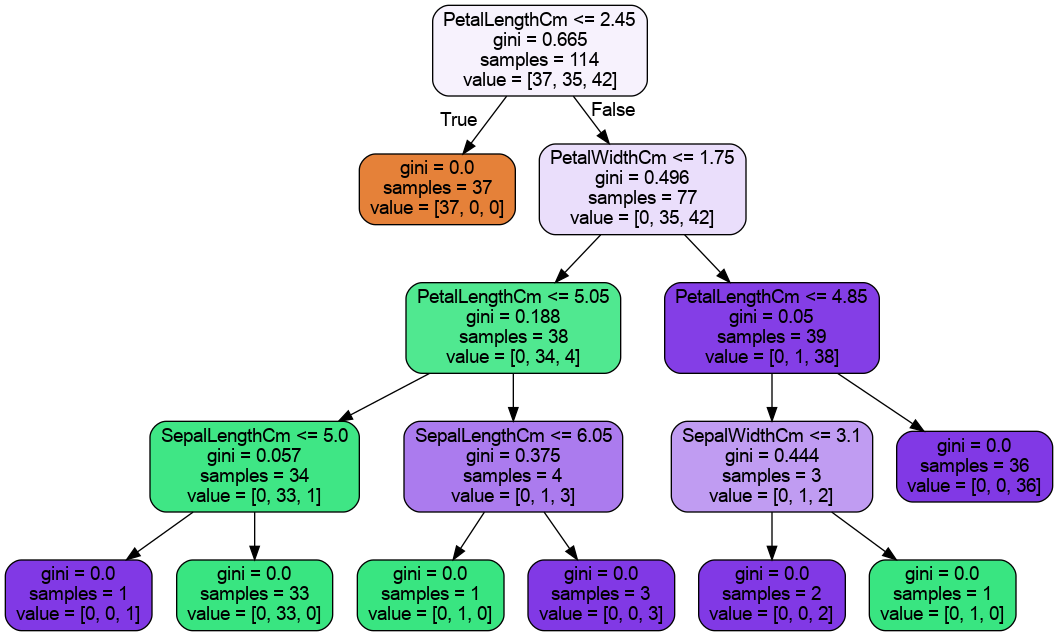

In [27]:
features = list(x.columns)
dot_data = export_graphviz(clf,feature_names=features,rounded=True,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Iris_Tree.png')
Image(graph.create_png())

In [28]:
# Hyperparameter tuning

In [29]:
# importinf GridSearchCV for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [30]:
grid_params = {
    'criterion' : ['gini','Entropy'],
    'max_depth' : range(2,6,1),
    'min_samples_leaf' : range(1,6,1),
    'min_samples_split' : range(2,6,1),
    'splitter' : ['best','random']
}

In [31]:
# Initializing GridSearchCV
grid_search = GridSearchCV(clf,param_grid=grid_params,cv=5,n_jobs=-1)

In [32]:
# Training GridSearchCV on training data to find best hyper parameters
grid_search.fit(x_train,y_train)

/home/ronak/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.92924901 0.86719368 0.95652174 0.7458498  0.92924901 0.78932806
 0.95652174 0.89565217 0.95652174 0.84150198 0.92924901 0.8770751
 0.92924901 0.93043478 0.92924901 0.88656126 0.92924901 0.86837945
 0.95652174 0.88498024 0.95652174 0.88695652 0.92924901 0.84229249
 0.92924901 0.8770751  0.92924901 0.88577075 0.95652174 0.84229249
 0.92924901 0.85019763 0.95652174 0.79683794 0.95652174 0.86798419
 0.92924901 0.85059289 0.95652174 0.87826087 0.94703557 0.86007905
 0.95612648 0.85968379 0.94703557 0.8687747  0.95612648 0.94782609
 0.95612648 0.86086957 0.95612648 0.87747036 0.95612648 0.86047431
 0.95612648 0.86837945 0.97351779 0.87667984 0.97351779 0.94782609
 0.97351779 0.88537549 0.97351779 0.89367589 0.94743083 0.89486166
 0.94743083 0.88577075 0.94743083 0.82529644 0.94743083 0.88537549
 0.95652174 0.88577075 0.94743083 0.87826087 0.956

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'splitter': ['best', 'random']})

In [33]:
best_parameters = grid_search.best_params_

In [34]:
best_parameters

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [35]:
grid_search.best_score_

0.9739130434782609

In [36]:
# again training the model using hyperparameters
clf = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=3,min_samples_split=2,splitter='best')

In [37]:
# Training the model on training data 
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [38]:
# prediction of x_test data 
y_pred = clf.predict(x_test)

In [39]:
y_pred


array([0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0,
       1, 1, 1, 2, 1, 0, 2])

In [41]:
# checking score of model after doing hyperparameter tuning
clf.score(x_test,y_test)

1.0

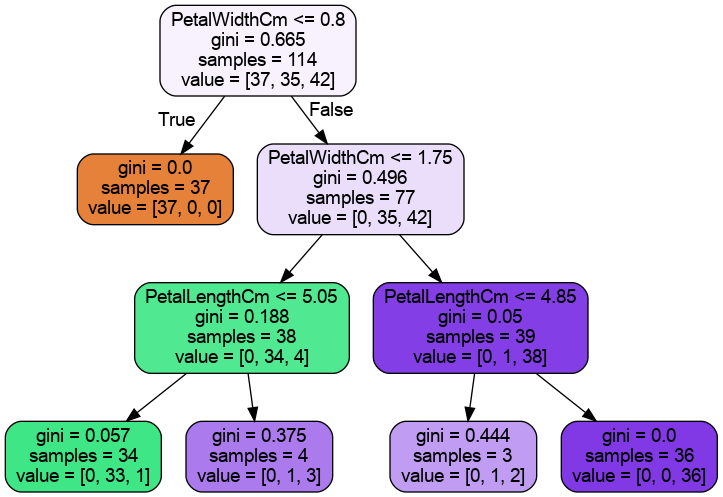

In [42]:
# displaying Tree after hyperparameter tuning
dot_data = export_graphviz(clf,feature_names=features,rounded=True,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [43]:
# saving models
import pickle
with open('Iris_DT_model.sav','wb') as f:
    pickle.dump(clf,f)

In [44]:
df.iloc[65]

SepalLengthCm    6.1
SepalWidthCm     2.8
PetalLengthCm    4.0
PetalWidthCm     1.3
Species          1.0
Name: 71, dtype: float64

In [45]:
clf.predict([[6.1,2.8,4.0,1]])

array([1])

In [46]:
clf.predict([[4.9,3.0,1.4,0.2]])

array([0])

In [47]:
clf.predict([[6.2,3.4,5.4,2.3]])

array([2])